# Project - 2 (Store opening prediction - Binary classification problem)

Each row represnts characteristic of a single planned store [planned does not mean opened].
Many categorical data has been coded to mask the data, you dont need to worry about their 
exact meaning if not clear

Id : Store ID 
numeric sale figures for 5 types :
1. sales0
2. sales1
3. sales2
4. sales3
5. sales4

6. country : categorical :: coded values for country 
7. State : categorical :: coded values for State
8. CouSub : numeric :: subscription values at county level
9. countyname : Categorical :: county names
10. storecode : categorical :: store codes , this should not be used as is but can be source of a feature
11. Areaname : categorical :: name of the area , many times matches with county name
12. countytownname : categorical :: county town name
13. population : numeric :: population of the store area
14. state_alpha : categorical :: short codes for state
15. store_Type : categorical :: type of store 

16. store : categorical 1/0 : target indicator var 1=opened 0=not opened 

## A. Importing necessary libraries

In [1]:
#Import the Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## B. Data import and sanity checks

In [3]:
#Getting the Data from the .csv file
data = pd.read_csv('store_train.csv', encoding='latin-1')

In [4]:
data.head(2)

,Id,sales0,sales1,sales2,sales3,sales4,country,State,CouSub,countyname,storecode,Areaname,countytownname,population,state_alpha,store_Type,store
0,2300919770,848,588,666,1116,1133,9,23,19770,Hancock County,NCNTY23009N23009,"Hancock County, ME",Eastbrook town,423.0,ME,Supermarket Type1,0
1,5000129575,925,717,780,1283,1550,1,50,29575,Addison County,NCNTY50001N50001,"Addison County, VT",Granville town,298.0,VT,Supermarket Type1,0


In [5]:
# understand shape and size of dataset
print(data.shape)

(3338, 17)


In [6]:
# Checking the overall data types
data.info()  # No null rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3338 entries, 0 to 3337
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              3338 non-null   int64  
 1   sales0          3338 non-null   int64  
 2   sales1          3338 non-null   int64  
 3   sales2          3338 non-null   int64  
 4   sales3          3338 non-null   int64  
 5   sales4          3338 non-null   int64  
 6   country         3338 non-null   int64  
 7   State           3338 non-null   int64  
 8   CouSub          3338 non-null   int64  
 9   countyname      3338 non-null   object 
 10  storecode       3338 non-null   object 
 11  Areaname        3338 non-null   object 
 12  countytownname  3338 non-null   object 
 13  population      3337 non-null   float64
 14  state_alpha     3338 non-null   object 
 15  store_Type      3338 non-null   object 
 16  store           3338 non-null   int64  
dtypes: float64(1), int64(10), object(

In [7]:
#Details of the Dataset
data.describe()

,Id,sales0,sales1,sales2,sales3,sales4,country,State,CouSub,population,store
count,3.338000e+03,3338.000000,3338.000000,3338.00000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3.337000e+03,3338.000000
mean,3.024341e+09,809.332534,570.453865,641.10695,1067.905932,1218.340024,73.943679,30.168664,80731.565608,7.076434e+04,0.438286
std,1.500609e+09,236.005440,168.792737,189.71265,298.884119,352.002767,96.602661,14.991198,30818.495056,2.855594e+05,0.496251
min,1.002000e+08,405.000000,314.000000,327.00000,519.000000,570.000000,1.000000,1.000000,100.000000,0.000000e+00,0.000000
25%,2.105250e+09,643.000000,453.000000,502.00000,860.000000,953.500000,13.000000,21.000000,64102.500000,4.247000e+03,0.000000
50%,2.704800e+09,718.000000,519.000000,574.00000,960.000000,1132.000000,35.000000,27.000000,99999.000000,1.591100e+04,0.000000
75%,4.209750e+09,924.000000,647.000000,735.00000,1199.000000,1411.000000,106.500000,42.000000,99999.000000,4.274500e+04,1.000000
max,7.803100e+09,2062.000000,1291.000000,1635.00000,2801.000000,3386.000000,840.000000,78.000000,99999.000000,9.818605e+06,1.000000


In [8]:
# Checking which column has null values and if yes - replacing those with median value of that column
for col in list(data.columns):
    print('{} has {} number of null values'.format(col, data[col].isnull().values.sum()))
    
#    if data[col].isnull().values.any():
#        data[col] = data[col].fillna(data[col].median)
#        print('replaced with median values')

Id has 0 number of null values
sales0 has 0 number of null values
sales1 has 0 number of null values
sales2 has 0 number of null values
sales3 has 0 number of null values
sales4 has 0 number of null values
country has 0 number of null values
State has 0 number of null values
CouSub has 0 number of null values
countyname has 0 number of null values
storecode has 0 number of null values
Areaname has 0 number of null values
countytownname has 0 number of null values
population has 1 number of null values
state_alpha has 0 number of null values
store_Type has 0 number of null values
store has 0 number of null values


In [9]:
# Since only 1 row is affected by Null values, hence we are dropping that row
data.dropna(inplace=True)

In [10]:
# Taking in the test data

test_data = pd.read_csv('store_test.csv', encoding='latin-1')
result_data = test_data

In [11]:
# Checking the distribution of the column countyname
for cat_col in ['countyname', 'storecode', 'Areaname', 'countytownname', 'state_alpha', 'store_Type']:
    print('Distribution of column {}'.format(cat_col))
    data[cat_col].value_counts()
    print('\n')

Distribution of column countyname


Washington County    70
Franklin County      61
Middlesex County     54
Aroostook County     48
Essex County         45
                     ..
Jay County            1
Fergus County         1
Woodbury County       1
Mower County          1
Kaufman County        1
Name: countyname, Length: 1491, dtype: int64



Distribution of column storecode


METRO14460MM1120    87
NCNTY23003N23003    48
METRO25540M25540    35
METRO39300M39300    34
METRO12620N23019    33
                    ..
NCNTY29127N29127     1
METRO35620MM0875     1
NCNTY19197N19197     1
NCNTY47101N47101     1
METRO41780M41780     1
Name: storecode, Length: 1891, dtype: int64



Distribution of column Areaname


Boston-Cambridge-Quincy, MA-NH HUD Metro FMR Area              87
Aroostook County, ME                                           48
Hartford-West Hartford-East Hartford, CT HUD Metro FMR Area    35
Providence-Fall River, RI-MA HUD Metro FMR Area                34
Penobscot County, ME (part) HUD Metro FMR Area                 33
                                                               ..
Racine, WI MSA                                                  1
Glades County, FL                                               1
Knott County, KY                                                1
Roane County, WV                                                1
Saunders County, NE HUD Metro FMR Area                          1
Name: Areaname, Length: 1891, dtype: int64



Distribution of column countytownname


Jackson County       20
Washington County    17
Jefferson County     16
Franklin County      16
Marion County        14
                     ..
Pemiscot County       1
Lincolnville town     1
Schuylkill County     1
Boxborough town       1
Haskell County        1
Name: countytownname, Length: 2371, dtype: int64



Distribution of column state_alpha


ME    363
MA    259
NH    177
VT    176
TX    170
CT    116
GA    108
VA     95
MO     93
KY     85
KS     75
NC     75
IA     72
IL     72
IN     66
TN     63
OH     63
NE     62
MI     62
OK     62
MS     60
MN     58
AR     54
PR     52
CA     50
WI     50
PA     47
AL     47
NY     45
FL     44
SD     43
CO     43
LA     41
WV     37
MT     35
ID     35
SC     33
RI     31
ND     31
WA     30
NM     23
AK     23
UT     21
OR     17
WY     17
MD     16
NV     12
AZ      9
NJ      8
HI      5
DE      3
DC      1
VI      1
GU      1
Name: state_alpha, dtype: int64



Distribution of column store_Type


Supermarket Type1    2205
Grocery Store         432
Supermarket Type3     360
Supermarket Type2     340
Name: store_Type, dtype: int64

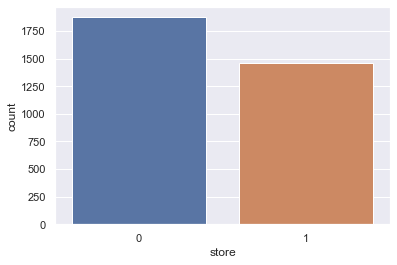

In [12]:
# Checking the distribution of the dependent/store column

sns.set(style="darkgrid")
ax = sns.countplot(x= 'store', data=data)

## C. Converting categorical columns to numbercal values

In [13]:
train_data = data # making a copy of the training data

In [14]:
all_data = pd.concat([train_data, test_data], ignore_index=True, sort=False)

In [15]:
# Converting the countyname column
countyname_keys = list(all_data['countyname'].unique())
countyname_dict = {countyname_keys[i]: i for i in range(len(countyname_keys))}

# Converting the storecode column
storecode_keys = list(all_data['storecode'].unique())
storecode_dict = {storecode_keys[i]: i for i in range(len(storecode_keys))}

# Converting the Areaname column
Areaname_keys = list(all_data['Areaname'].unique())
Areaname_dict = {Areaname_keys[i]: i for i in range(len(Areaname_keys))}

# Converting the countytownname column
countytownname_keys = list(all_data['countytownname'].unique())
countytownname_dict = {countytownname_keys[i]: i for i in range(len(countytownname_keys))}

# Converting the state_alpha column
state_alpha_keys = list(all_data['state_alpha'].unique())
state_alpha_dict = {state_alpha_keys[i]: i for i in range(len(state_alpha_keys))}

# Converting the store_Type column
store_Type_keys = list(all_data['store_Type'].unique())
store_Type_dict = {store_Type_keys[i]: i for i in range(len(store_Type_keys))}

In [16]:
train_data = train_data.drop('Id', axis=1) # Dropping the ID column

In [17]:
# Replacing all the categorical columns with the help of the dictionaries

train_data['countyname'].replace(countyname_dict, inplace=True)
train_data['storecode'].replace(storecode_dict, inplace=True)
train_data['Areaname'].replace(Areaname_dict, inplace=True)
train_data['countytownname'].replace(countytownname_dict, inplace=True)
train_data['state_alpha'].replace(state_alpha_dict, inplace=True)
train_data['store_Type'].replace(store_Type_dict, inplace=True)

In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3337 entries, 0 to 3337
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sales0          3337 non-null   int64  
 1   sales1          3337 non-null   int64  
 2   sales2          3337 non-null   int64  
 3   sales3          3337 non-null   int64  
 4   sales4          3337 non-null   int64  
 5   country         3337 non-null   int64  
 6   State           3337 non-null   int64  
 7   CouSub          3337 non-null   int64  
 8   countyname      3337 non-null   int64  
 9   storecode       3337 non-null   int64  
 10  Areaname        3337 non-null   int64  
 11  countytownname  3337 non-null   int64  
 12  population      3337 non-null   float64
 13  state_alpha     3337 non-null   int64  
 14  store_Type      3337 non-null   int64  
 15  store           3337 non-null   int64  
dtypes: float64(1), int64(15)
memory usage: 603.2 KB


## D. Checking the correlation among columns

In [19]:
# plotting pair plot for finding the corelation between the independent variables:
#sns.pairplot(train_data ,markers="+", diag_kind='kde')
#plt.figure(figsize=(20,20))

In [20]:
# Checking the corelation coefficient of each variables :
cor=train_data.corr()
cor

,sales0,sales1,sales2,sales3,sales4,country,State,CouSub,countyname,storecode,Areaname,countytownname,population,state_alpha,store_Type,store
sales0,1.000000,0.953189,0.987668,0.978740,0.944704,-0.211660,-0.131488,-0.443430,-0.228135,-0.394983,-0.394983,0.100281,0.178711,-0.130521,-0.000707,0.318048
sales1,0.953189,1.000000,0.960939,0.930821,0.900522,-0.199434,-0.094708,-0.454938,-0.235189,-0.410283,-0.410283,0.106405,0.155749,-0.159065,0.000153,0.281907
sales2,0.987668,0.960939,1.000000,0.967632,0.939780,-0.211411,-0.117094,-0.454103,-0.234884,-0.418961,-0.418961,0.103449,0.184894,-0.143185,0.002992,0.325791
sales3,0.978740,0.930821,0.967632,1.000000,0.956004,-0.184333,-0.142587,-0.383370,-0.183188,-0.351437,-0.351437,0.096181,0.210283,-0.096387,0.002442,0.320839
sales4,0.944704,0.900522,0.939780,0.956004,1.000000,-0.165720,-0.118148,-0.357830,-0.172462,-0.347444,-0.347444,0.092967,0.219664,-0.082292,-0.002554,0.316333
country,-0.211660,-0.199434,-0.211411,-0.184333,-0.165720,1.000000,0.150750,0.392266,0.279916,0.242512,0.242512,-0.034766,0.026169,0.261538,0.045582,-0.029898
State,-0.131488,-0.094708,-0.117094,-0.142587,-0.118148,0.150750,1.000000,0.068021,0.094819,-0.001710,-0.001710,0.036391,-0.048358,0.051460,0.002368,-0.042177
CouSub,-0.443430,-0.454938,-0.454103,-0.383370,-0.357830,0.392266,0.068021,1.000000,0.468323,0.534306,0.534306,-0.140053,0.134758,0.474195,-0.008405,-0.077121
countyname,-0.228135,-0.235189,-0.234884,-0.183188,-0.172462,0.279916,0.094819,0.468323,1.000000,0.621674,0.621674,0.595616,0.117804,0.314140,0.029730,-0.048708
storecode,-0.394983,-0.410283,-0.418961,-0.351437,-0.347444,0.242512,-0.001710,0.534306,0.621674,1.000000,1.000000,0.197133,0.038920,0.309279,0.001947,-0.198876


(<Figure size 1080x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2ea54413850>)

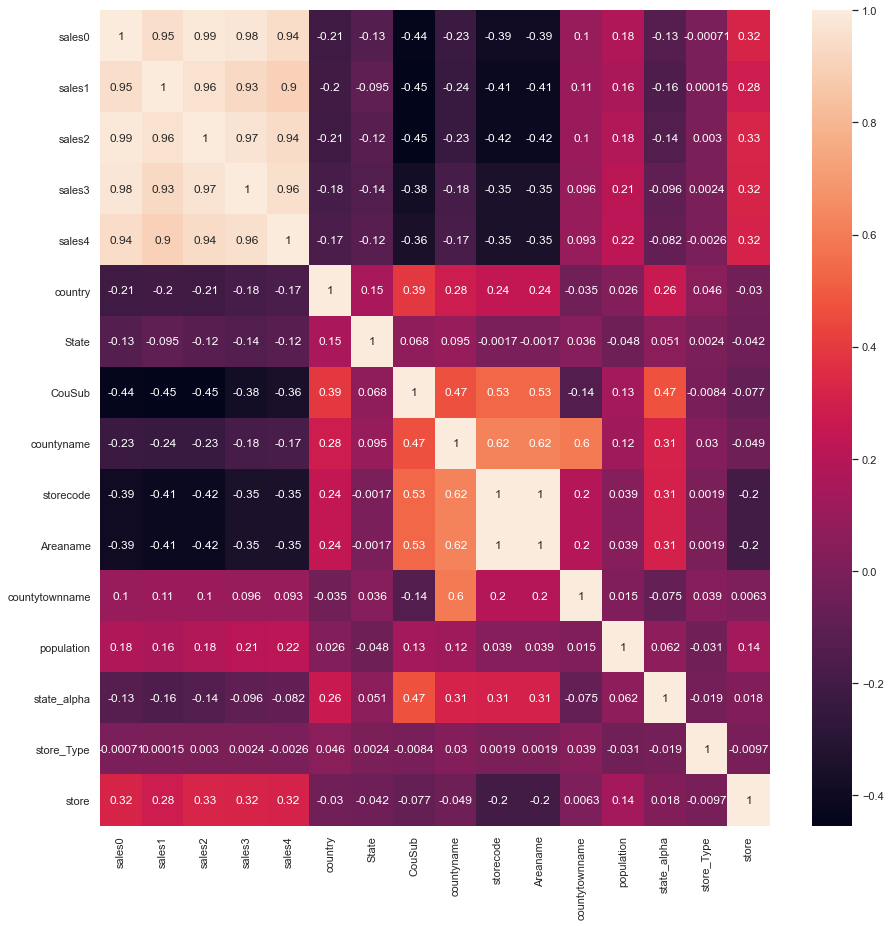

In [21]:
# Plotting the Heatmap with the variables

plt.subplots(figsize=(15,15))
sns.heatmap(cor,annot=True)

In [22]:
# Correlation plot | Checking which relations has the higher coefficients : 
cor.loc[:,:] = np.tril(cor, k=-1) # making the diagonal elements zeo

high_cor = cor.stack()
high_cor = high_cor[(high_cor > 0.55) | (high_cor < -0.55)]
high_cor

sales1          sales0        0.953189
sales2          sales0        0.987668
                sales1        0.960939
sales3          sales0        0.978740
                sales1        0.930821
                sales2        0.967632
sales4          sales0        0.944704
                sales1        0.900522
                sales2        0.939780
                sales3        0.956004
storecode       countyname    0.621674
Areaname        countyname    0.621674
                storecode     1.000000
countytownname  countyname    0.595616
dtype: float64

This investigation indicates that, all the salesX are highly corelated among them, and storecode is identical with Areaname.

In [23]:
#train_data = train_data.drop(['Areaname', 'sales1', 'countyname', 'sales2', 'sales3', 'sales4', 'countytownname'], axis=1) 
train_data = train_data.drop(['Areaname', 'countytownname', 'countyname'], axis=1)
# Dropping the Areaname column as well

In [24]:
#train_data = pd.get_dummies(train_data, columns=['country', 'State'])

## E. Splitting the dataset and creating train and test sets

In [25]:
# Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit

In [26]:
# Copy all the predictor variables into X dataframe. Since 'store' is dependent variable
X = train_data.drop('store', axis=1)

# Copy the 'store' column alone into the y dataframe. This is the dependent variable
y = train_data[['store']]

In [27]:
# Normalizing the all the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [28]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [29]:
# K-fold splits
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

## F. Training ensemble classification models only

In [30]:
# Importing the necessery classifcation algorithms

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix

### F1. Bagging model

In [31]:
# Building our model with K-fold validation and GridSearch to find the best parameters

# Defining all the parameters
params = {
    'max_features': [3],
    'min_samples_split': [10],
    'min_samples_leaf': [10],
    'bootstrap': [False],
    'n_estimators' :[500],
    'criterion': ["entropy"]
}

# Building model
rfc = RandomForestClassifier()

# Parameter estimating using GridSearch
grid = GridSearchCV(rfc, param_grid=params, scoring='accuracy', n_jobs =-1, cv=cv, verbose=1)

# Fitting the model
grid.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   20.8s finished


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'criterion': ['entropy'],
                         'max_features': [3], 'min_samples_leaf': [10],
                         'min_samples_split': [10], 'n_estimators': [500]},
             scoring='accuracy', verbose=1)

In [32]:
rfc_grid_val_score = grid.best_score_
print('Best Score:', rfc_grid_val_score)
print('Best Params:', grid.best_params_)
print('Best Estimator:', grid.best_estimator_)

Best Score: 0.784019975031211
Best Params: {'bootstrap': False, 'criterion': 'entropy', 'max_features': 3, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 500}
Best Estimator: RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=3,
                       min_samples_leaf=10, min_samples_split=10,
                       n_estimators=500)


In [33]:
# Using the best parameters from the grid-search and predicting on test feature dataset(X_test)

rfc_grid= grid.best_estimator_
y_pred = rfc_grid.predict(X_test)

In [34]:
# Confusion matrix

pd.DataFrame(confusion_matrix(y_test,y_pred), columns=["Predicted A", "Predicted T"], index=["Actual A","Actual T"] )

,Predicted A,Predicted T
Actual A,331,54
Actual T,94,189


### F2. Boosting 

In [35]:
# Building our model with K-fold validation and GridSearch to find the best parameters

# Defining all the parameters

params = {
'learning_rate': [0.1], 
'min_samples_split': [500], 
'min_samples_leaf': [50], 
'max_depth': [8], 
'max_features': ['sqrt'], 
'subsample': [0.8], 
'random_state': [10]}


# Building model
gbc = GradientBoostingClassifier()

# Parameter estimating using GridSearch
grid = GridSearchCV(gbc, param_grid=params, scoring='accuracy', n_jobs =-1, cv=cv, verbose=1)

# Fitting the model
grid.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.0s finished


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [8],
                         'max_features': ['sqrt'], 'min_samples_leaf': [50],
                         'min_samples_split': [500], 'random_state': [10],
                         'subsample': [0.8]},
             scoring='accuracy', verbose=1)

In [36]:
gbc_grid_val_score = grid.best_score_
print('Best Score:', gbc_grid_val_score)
print('Best Params:', grid.best_params_)
print('Best Estimator:', grid.best_estimator_)

Best Score: 0.7706616729088639
Best Params: {'learning_rate': 0.1, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'min_samples_split': 500, 'random_state': 10, 'subsample': 0.8}
Best Estimator: GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                           min_samples_leaf=50, min_samples_split=500,
                           random_state=10, subsample=0.8)


In [37]:
# Using the best parameters from the grid-search and predicting on test feature dataset(X_test)

gbc_grid= grid.best_estimator_
y_pred = gbc_grid.predict(X_test)

In [38]:
# Confusion matrix

pd.DataFrame(confusion_matrix(y_test,y_pred), columns=["Predicted A", "Predicted T"], index=["Actual A","Actual T"] )

,Predicted A,Predicted T
Actual A,333,52
Actual T,93,190


## G. Final model creation

In [39]:
# The final model
rfc = RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=3,
                       min_samples_leaf=10, min_samples_split=10,
                       n_estimators=500)

In [40]:
# The pre-requisite data cleaning
test_data = test_data.drop(['Id', 'Areaname', 'countytownname', 'countyname'], axis=1) # Dropping the unnecessary columns

test_data['storecode'].replace(storecode_dict, inplace=True)
test_data['state_alpha'].replace(state_alpha_dict, inplace=True)
test_data['store_Type'].replace(store_Type_dict, inplace=True)

In [41]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1431 entries, 0 to 1430
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sales0       1431 non-null   int64  
 1   sales1       1431 non-null   int64  
 2   sales2       1431 non-null   int64  
 3   sales3       1431 non-null   int64  
 4   sales4       1431 non-null   int64  
 5   country      1430 non-null   float64
 6   State        1431 non-null   int64  
 7   CouSub       1431 non-null   int64  
 8   storecode    1431 non-null   int64  
 9   population   1430 non-null   float64
 10  state_alpha  1431 non-null   int64  
 11  store_Type   1431 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 134.3 KB


In [42]:
# Handling the null values present in test data columns
test_data['country'].fillna(test_data['country'].median(), inplace=True)
test_data['population'].fillna(test_data['population'].median(), inplace=True)

In [43]:
test_input_data = test_data.to_numpy()

In [44]:
test_input_data = scaler.fit_transform(test_input_data)

In [45]:
rfc.fit(X, y) # Training the model with full dataset

RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=3,
                       min_samples_leaf=10, min_samples_split=10,
                       n_estimators=500)

In [46]:
test_pred = rfc.predict(test_input_data)
test_pred_prob = rfc.predict_proba(test_input_data)

In [47]:
result_data['prediction'] = pd.Series(test_pred)
result_data['prediction_probablitiy'] = pd.Series([i[1] for i in list(test_pred_prob)])

In [48]:
result_data.head()

,Id,sales0,sales1,sales2,sales3,sales4,country,State,CouSub,countyname,storecode,Areaname,countytownname,population,state_alpha,store_Type,prediction,prediction_probablitiy
0,101799999,696,511,514,867,1034,17.0,1,99999,Chambers County,NCNTY01017N01017,"Chambers County, AL",Chambers County,34215.0,AL,Supermarket Type1,0,0.322640
1,101999999,599,481,500,883,894,19.0,1,99999,Cherokee County,NCNTY01019N01019,"Cherokee County, AL",Cherokee County,25989.0,AL,Supermarket Type1,0,0.175543
2,102199999,599,423,475,802,1061,21.0,1,99999,Chilton County,METRO13820N01021,"Chilton County, AL HUD Metro FMR Area",Chilton County,43643.0,AL,Supermarket Type1,0,0.312999
3,103599999,599,459,462,883,886,35.0,1,99999,Conecuh County,NCNTY01035N01035,"Conecuh County, AL",Conecuh County,13228.0,AL,Supermarket Type1,0,0.197765
4,103799999,599,481,505,746,801,37.0,1,99999,Coosa County,NCNTY01037N01037,"Coosa County, AL",Coosa County,11539.0,AL,Supermarket Type3,0,0.214415


In [52]:
result_data.tail()

,Id,sales0,sales1,sales2,sales3,sales4,country,State,CouSub,countyname,storecode,Areaname,countytownname,population,state_alpha,store_Type,prediction,prediction_probablitiy
1426,2202599999,627,493,524,924,1010,25.0,22,99999,Catahoula Parish,NCNTY22025N22025,"Catahoula Parish, LA",Catahoula Parish,10407.0,LA,Supermarket Type1,0,0.165560
1427,4826999999,651,461,506,811,944,269.0,48,99999,King County,NCNTY48269N48269,"King County, TX",King County,286.0,TX,Supermarket Type1,0,0.276396
1428,2301333840,922,743,748,1182,1232,13.0,23,33840,Knox County,NCNTY23013N23013,"Knox County, ME",Hope town,1536.0,ME,Supermarket Type3,0,0.284614
1429,1908199999,593,402,438,739,862,81.0,19,99999,Hancock County,NCNTY19081N19081,"Hancock County, IA",Hancock County,11341.0,IA,Supermarket Type1,0,0.056396
1430,2302559705,746,599,627,1015,1019,25.0,23,59705,Somerset County,NCNTY23025N23025,"Somerset County, ME",Pleasant Ridge plantation,93.0,ME,Supermarket Type1,0,0.266544


In [53]:
result_data['prediction'].value_counts()

0    900
1    531
Name: prediction, dtype: int64

In [49]:
result_data.shape

(1431, 18)

In [54]:
result_data.to_csv('bitan_project2_result.csv')